In [1]:
# Import thư viện cần thiết
from os import listdir
import cv2
import numpy as np
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model

import matplotlib.pyplot as plt

import random

#from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ModelCheckpoint

In [2]:
# Đường dẫn tới thư mục chứa ảnh dùng để train
data_folder = "/content/drive/MyDrive/DeepLearning/fruit/Training"

In [3]:
# Hàm tạo data bao gồm các hình ảnh trong thư mục và gán nhãn 
def save_data(data_folder=data_folder):

    img_size = (64, 64)
    print("Bắt đầu thêm ảnh...")

    images = []
    labels = []
    names = []

    # Đọc các thư mục con trong folder data
    for folder in listdir(data_folder):
        if folder!='.DS_Store':
            print(folder)
            names.append(folder)
            # Đọc các file trong thư mục con và lưu hình vào images, nhãn vào label
            for file in listdir(data_folder  + folder):
                if file!='.DS_Store':
                    images.append(cv2.resize(cv2.imread(data_folder  + folder +"/" + file),dsize=(64,64)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)#.reshape(-1,1)

    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file1 = open('/content/drive/MyDrive/DeepLearning/fruit/fruit-train.data','wb')
    file2 = open('/content/drive/MyDrive/DeepLearning/fruit/fruit-train-class.data','wb')
    # dump information to that file
    pickle.dump((images,labels), file1)
    pickle.dump(names, file2)
    # close the file
    file1.close()
    file2.close()

    return

In [4]:
# Chạy hàm save_data() để lưu data, chỉ chạy 1 lần
#save_data()

In [5]:
# Hàm tải data lên để sử dụng data vừa lưu
def load_data():
    file = open('/content/drive/MyDrive/DeepLearning/fruit/fruit-train.data', 'rb')

    # dump information to that file
    (images, labels) = pickle.load(file)

    # close the file
    file.close()

    print(images.shape)
    print(labels.shape)


    return images, labels

In [6]:
# Thư mục chứa ảnh test
test_folder = "/content/drive/MyDrive/DeepLearning/fruit/Test"

In [7]:
# Hàm tạo test data từ các hình ảnh trong thư mục test đồng thời gán nhãn
def save_test_data(test_folder=test_folder):

    img_size = (64, 64)
    print("Bắt đầu thêm ảnh...")

    images = []
    labels = []
    names = []

    # Đọc các thư mục con trong folder data
    for folder in listdir(test_folder):
        if folder!='.DS_Store':
            print(folder)
            names.append(folder)
            # Đọc các file trong thư mục con và lưu hình vào images, nhãn vào label
            for file in listdir(test_folder  + folder):
                if file!='.DS_Store':
                    images.append(cv2.resize(cv2.imread(test_folder  + folder +"/" + file),dsize=(64,64)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)#.reshape(-1,1)

    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file1 = open('/content/drive/MyDrive/DeepLearning/fruit/fruit-test.data','wb')
    file2 = open('/content/drive/MyDrive/DeepLearning/fruit/fruit-test-class.data','wb')
    # dump information to that file
    pickle.dump((images,labels), file1)
    pickle.dump(names, file2)
    # close the file
    file1.close()
    file2.close()

    return

In [8]:
# Chạy hàm save_test_data() để lưu data, chỉ chạy 1 lần
#save_test_data()

In [9]:
# Hàm tải lại test data đã lưu
def load_test_data():
    file = open('/content/drive/MyDrive/DeepLearning/fruit/fruit-test.data', 'rb')

    # dump information to that file
    (images, labels) = pickle.load(file)

    # close the file
    file.close()

    print(images.shape)
    print(labels.shape)

    return images, labels

In [10]:
# Hàm tải class của các test data
def load_class():
    file = open('/content/drive/MyDrive/DeepLearning/fruit/fruit-test-class.data', 'rb')

    # dump information to that file
    names = pickle.load(file)

    # close the file
    file.close()

    print(len(names))
    
    return names

In [11]:
# Load data và lưu và biến X, y
X,y = load_data()

(67692, 64, 64, 3)
(67692, 131)


In [12]:
# Chia tập dữ liệu thành 80% dùng để train, 20% dùng để test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(y_train.shape)

(54153, 64, 64, 3)
(54153, 131)


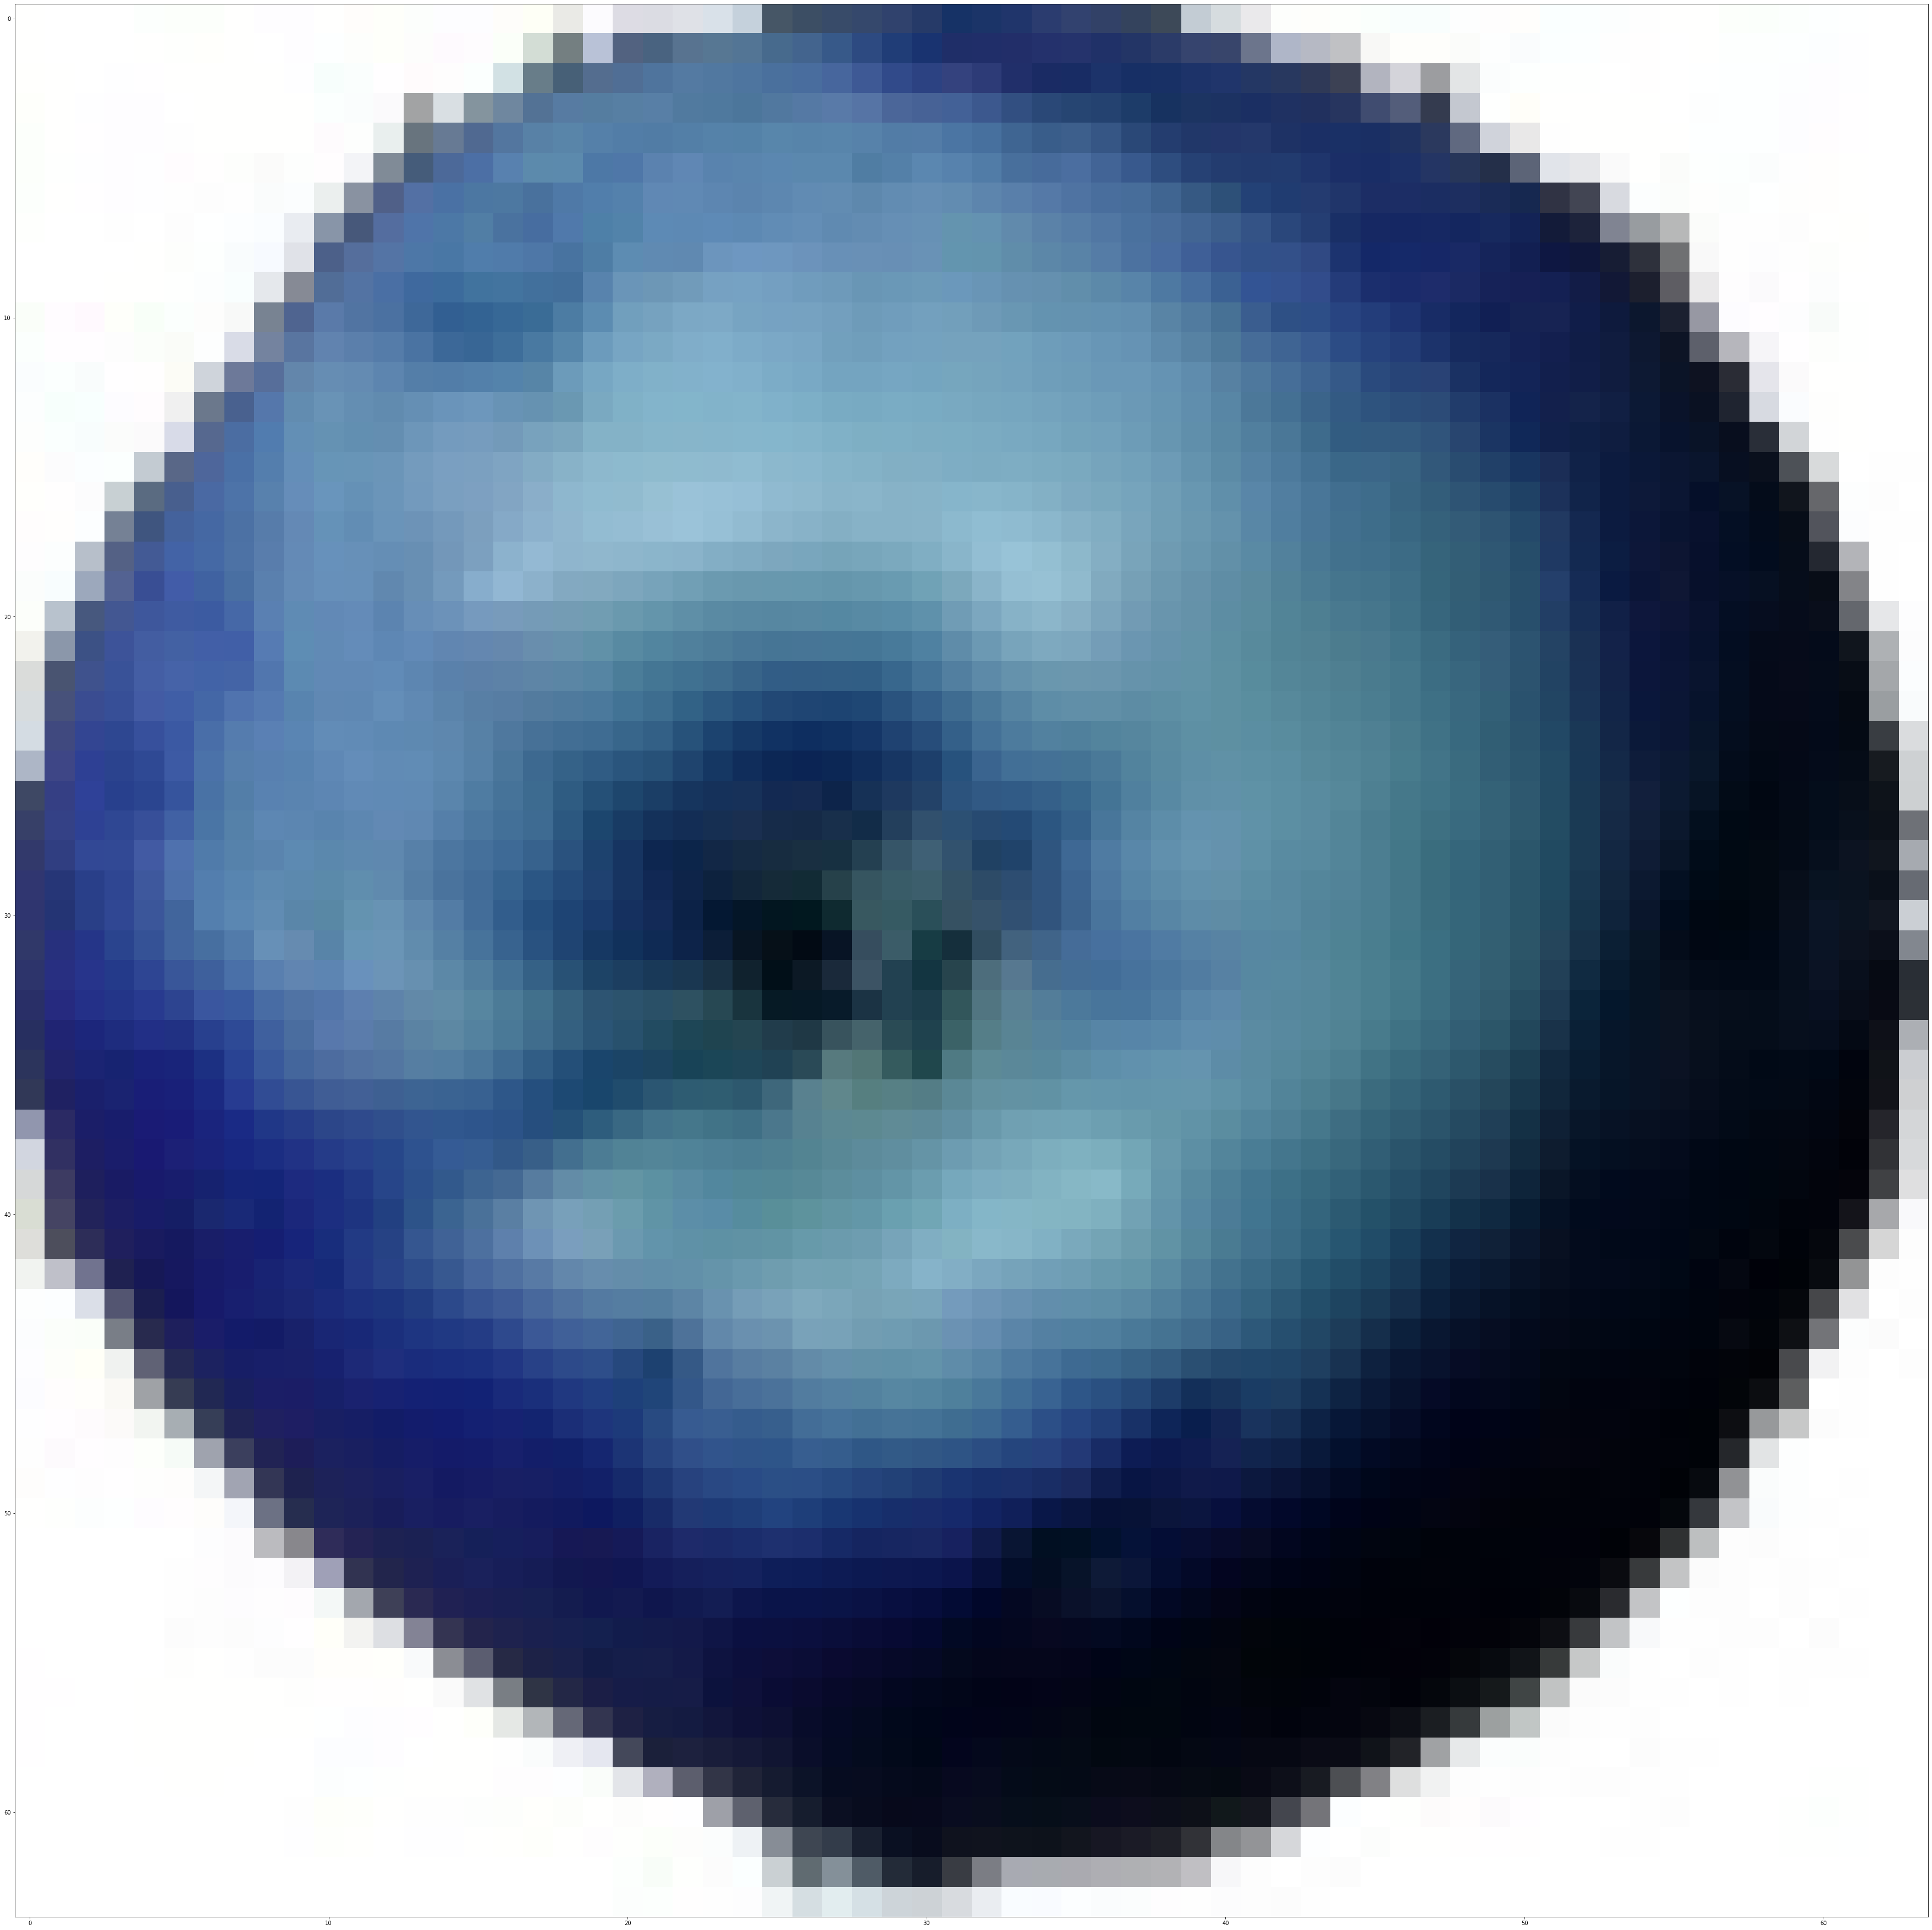

In [13]:
#Hiển thị ngẫu nhiên 1 dữ liệu
plt.figure(figsize=(64, 64))
plt.imshow(X_train[random.randint(0,len(X_train))])

In [14]:
# Hàm dùng để chuẩn hoá dữ liệu ảnh
def convertImage(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img /255
    
    return img

In [15]:
# Chuẩn hoá dữ liệu (Normalize the data)
X_train = np.array(list(map(convertImage, X_train)))
X_test = np.array(list(map(convertImage, X_test)))

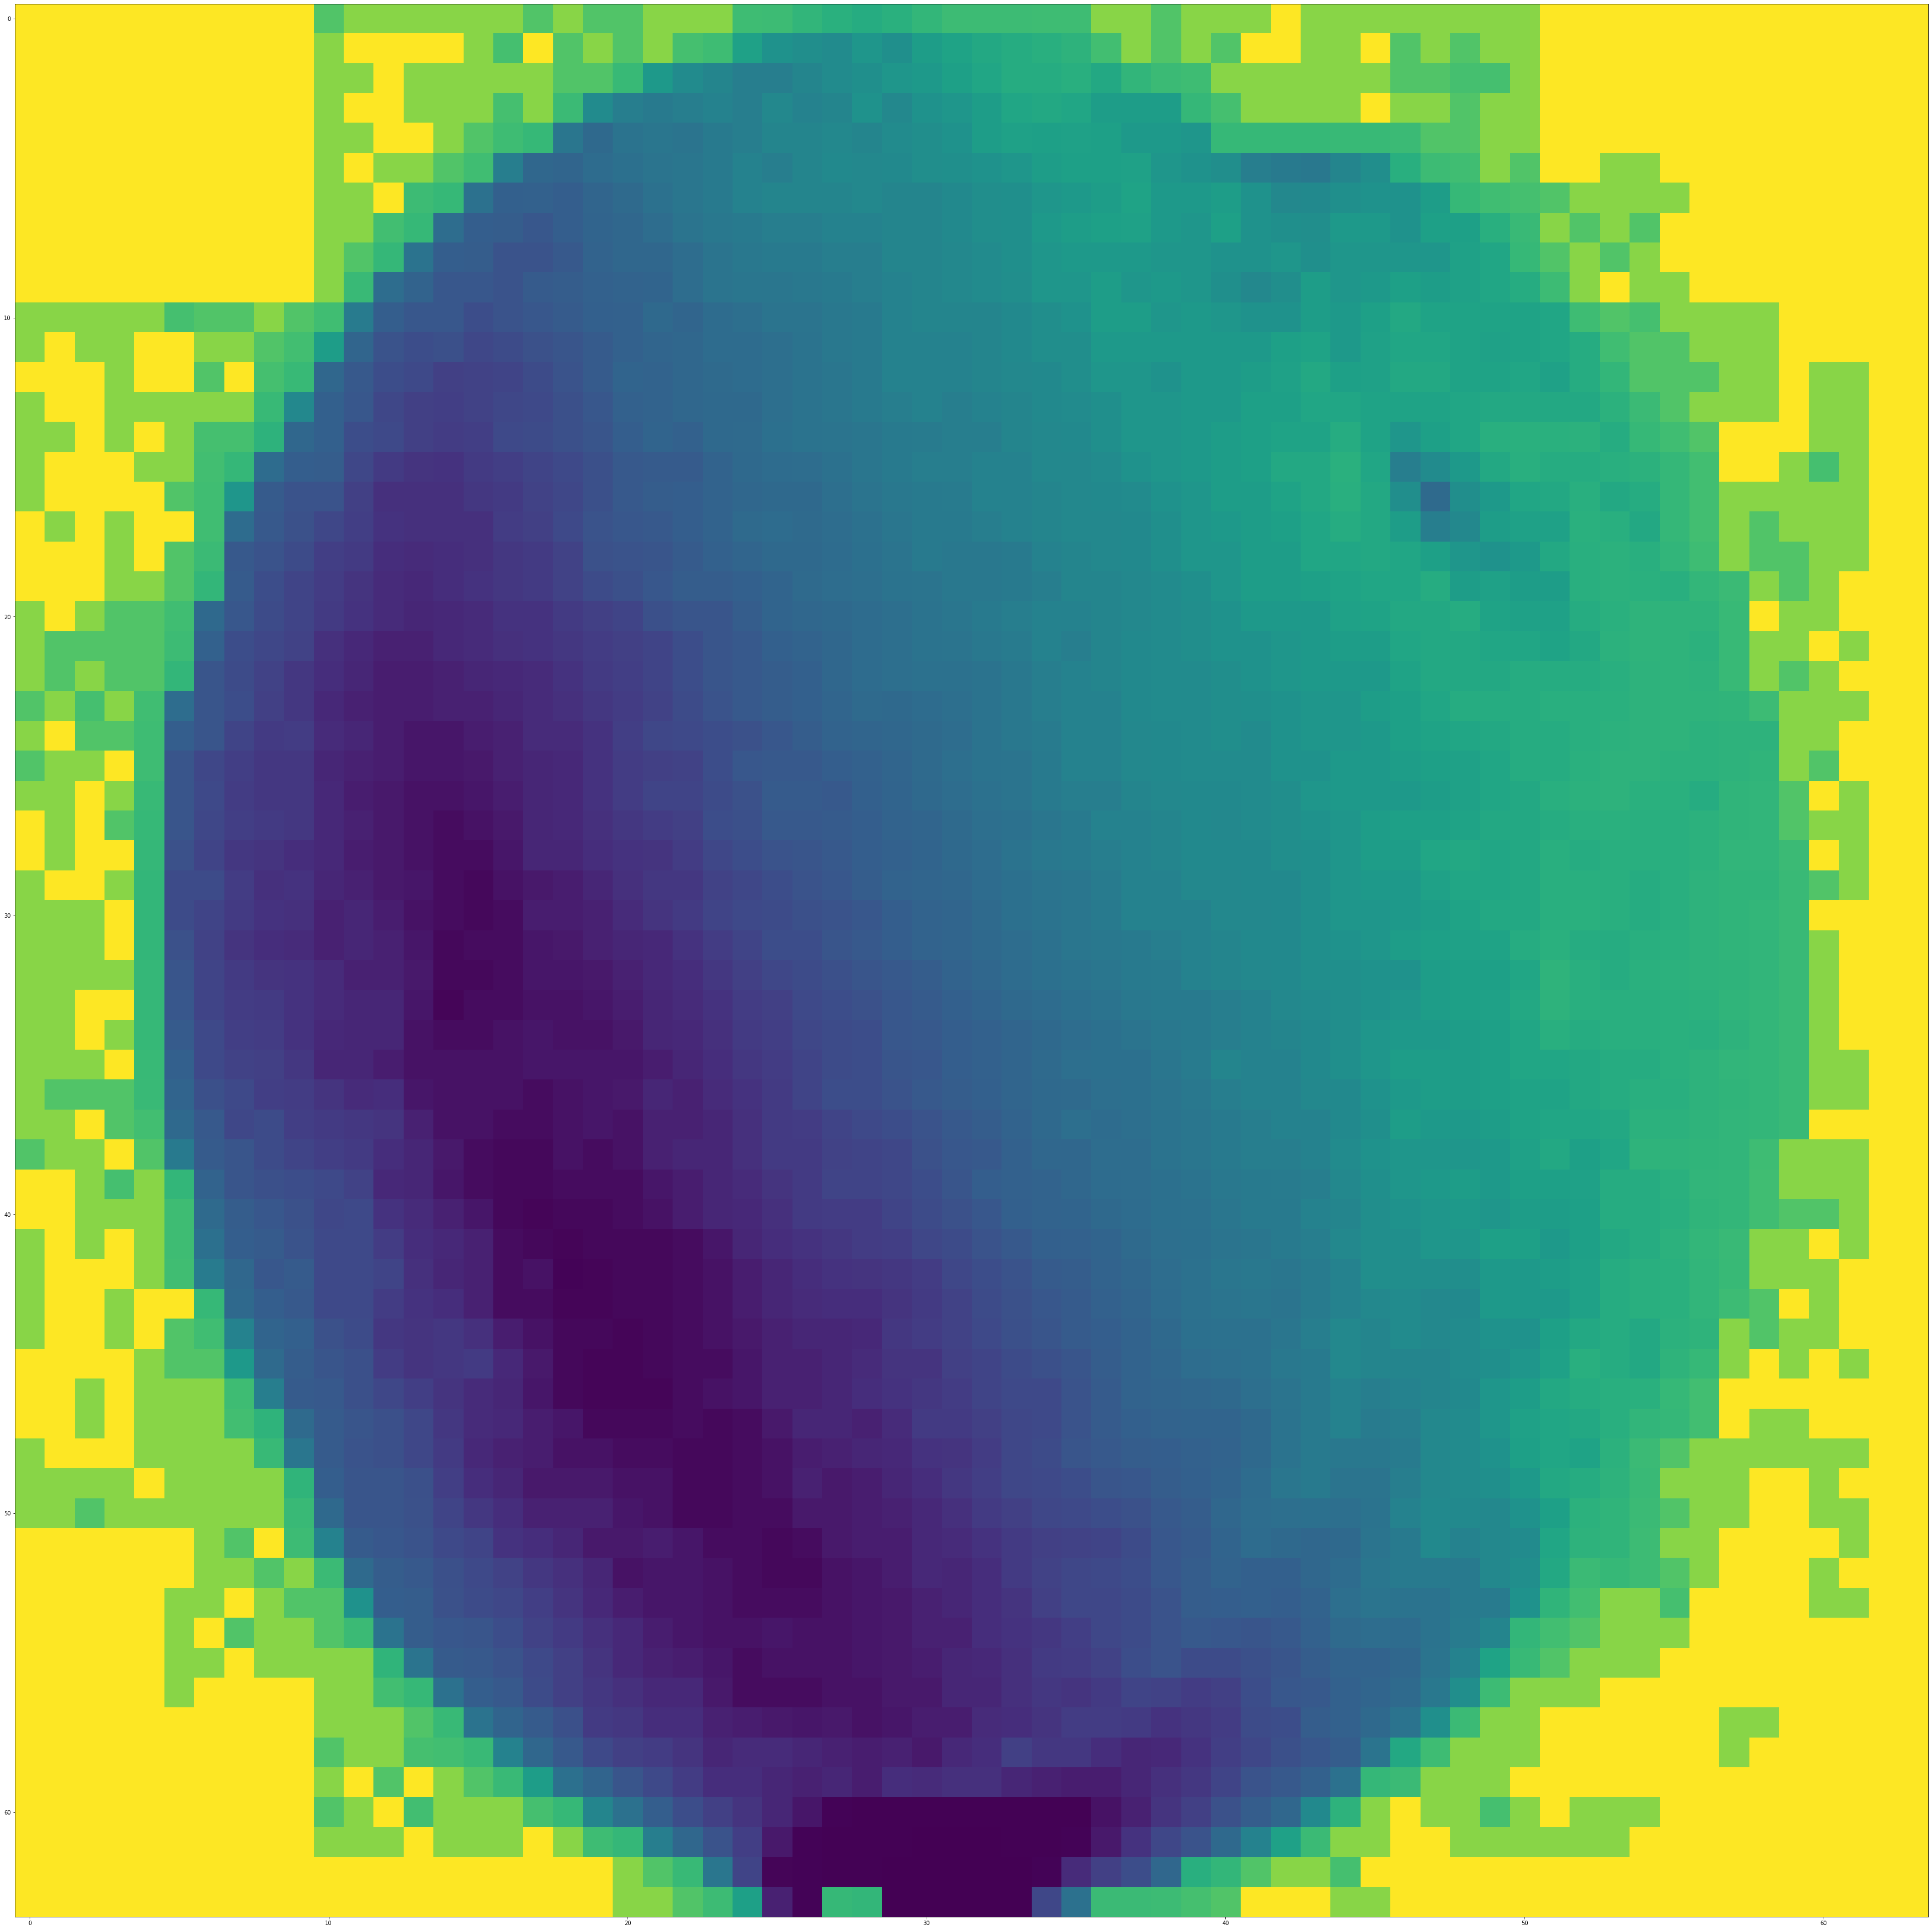

In [16]:
# Hiển thị ngẫu nhiên 1 dữ liệu đã chuẩn hoá
plt.figure(figsize=(64, 64))
plt.imshow(X_train[random.randint(0,len(X_train))])

In [17]:
# Reshape data để phù hợp với Input_shape của Model
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

In [18]:
# Create CNN Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(input_shape = (64,64,1), filters = 20, kernel_size = (5,5), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 40, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=1024, activation = "relu"))
model.add(Dense(units=512, activation = "relu"))
model.add(Dense(units=131, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 40)        7240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 80)        28880     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 80)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 80)          0

In [19]:
# Huấn luyện model và lưu lại model
hist = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test))
model.save("/content/drive/MyDrive/DeepLearning/fruit/fruit-classifier.h5")

Epoch 1/10
1693/1693 [==============================] - 59s 9ms/step - loss: 2.0369 - accuracy: 0.5036 - val_loss: 0.2009 - val_accuracy: 0.9420
Epoch 2/10
1693/1693 [==============================] - 13s 7ms/step - loss: 0.1132 - accuracy: 0.9661 - val_loss: 0.0532 - val_accuracy: 0.9850
Epoch 3/10
1693/1693 [==============================] - 14s 8ms/step - loss: 0.0652 - accuracy: 0.9812 - val_loss: 0.0540 - val_accuracy: 0.9873
Epoch 4/10
1693/1693 [==============================] - 13s 7ms/step - loss: 0.0455 - accuracy: 0.9875 - val_loss: 0.0249 - val_accuracy: 0.9931
Epoch 5/10
1693/1693 [==============================] - 12s 7ms/step - loss: 0.0440 - accuracy: 0.9878 - val_loss: 0.0647 - val_accuracy: 0.9879
Epoch 6/10
1693/1693 [==============================] - 12s 7ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0365 - val_accuracy: 0.9905
Epoch 7/10
1693/1693 [==============================] - 14s 8ms/step - loss: 0.0310 - accuracy: 0.9917 - val_loss: 0.0320 - val_ac

(22688, 64, 64, 3)
(22688, 131)
131
True Class:  Banana
Predicted Class:  Banana


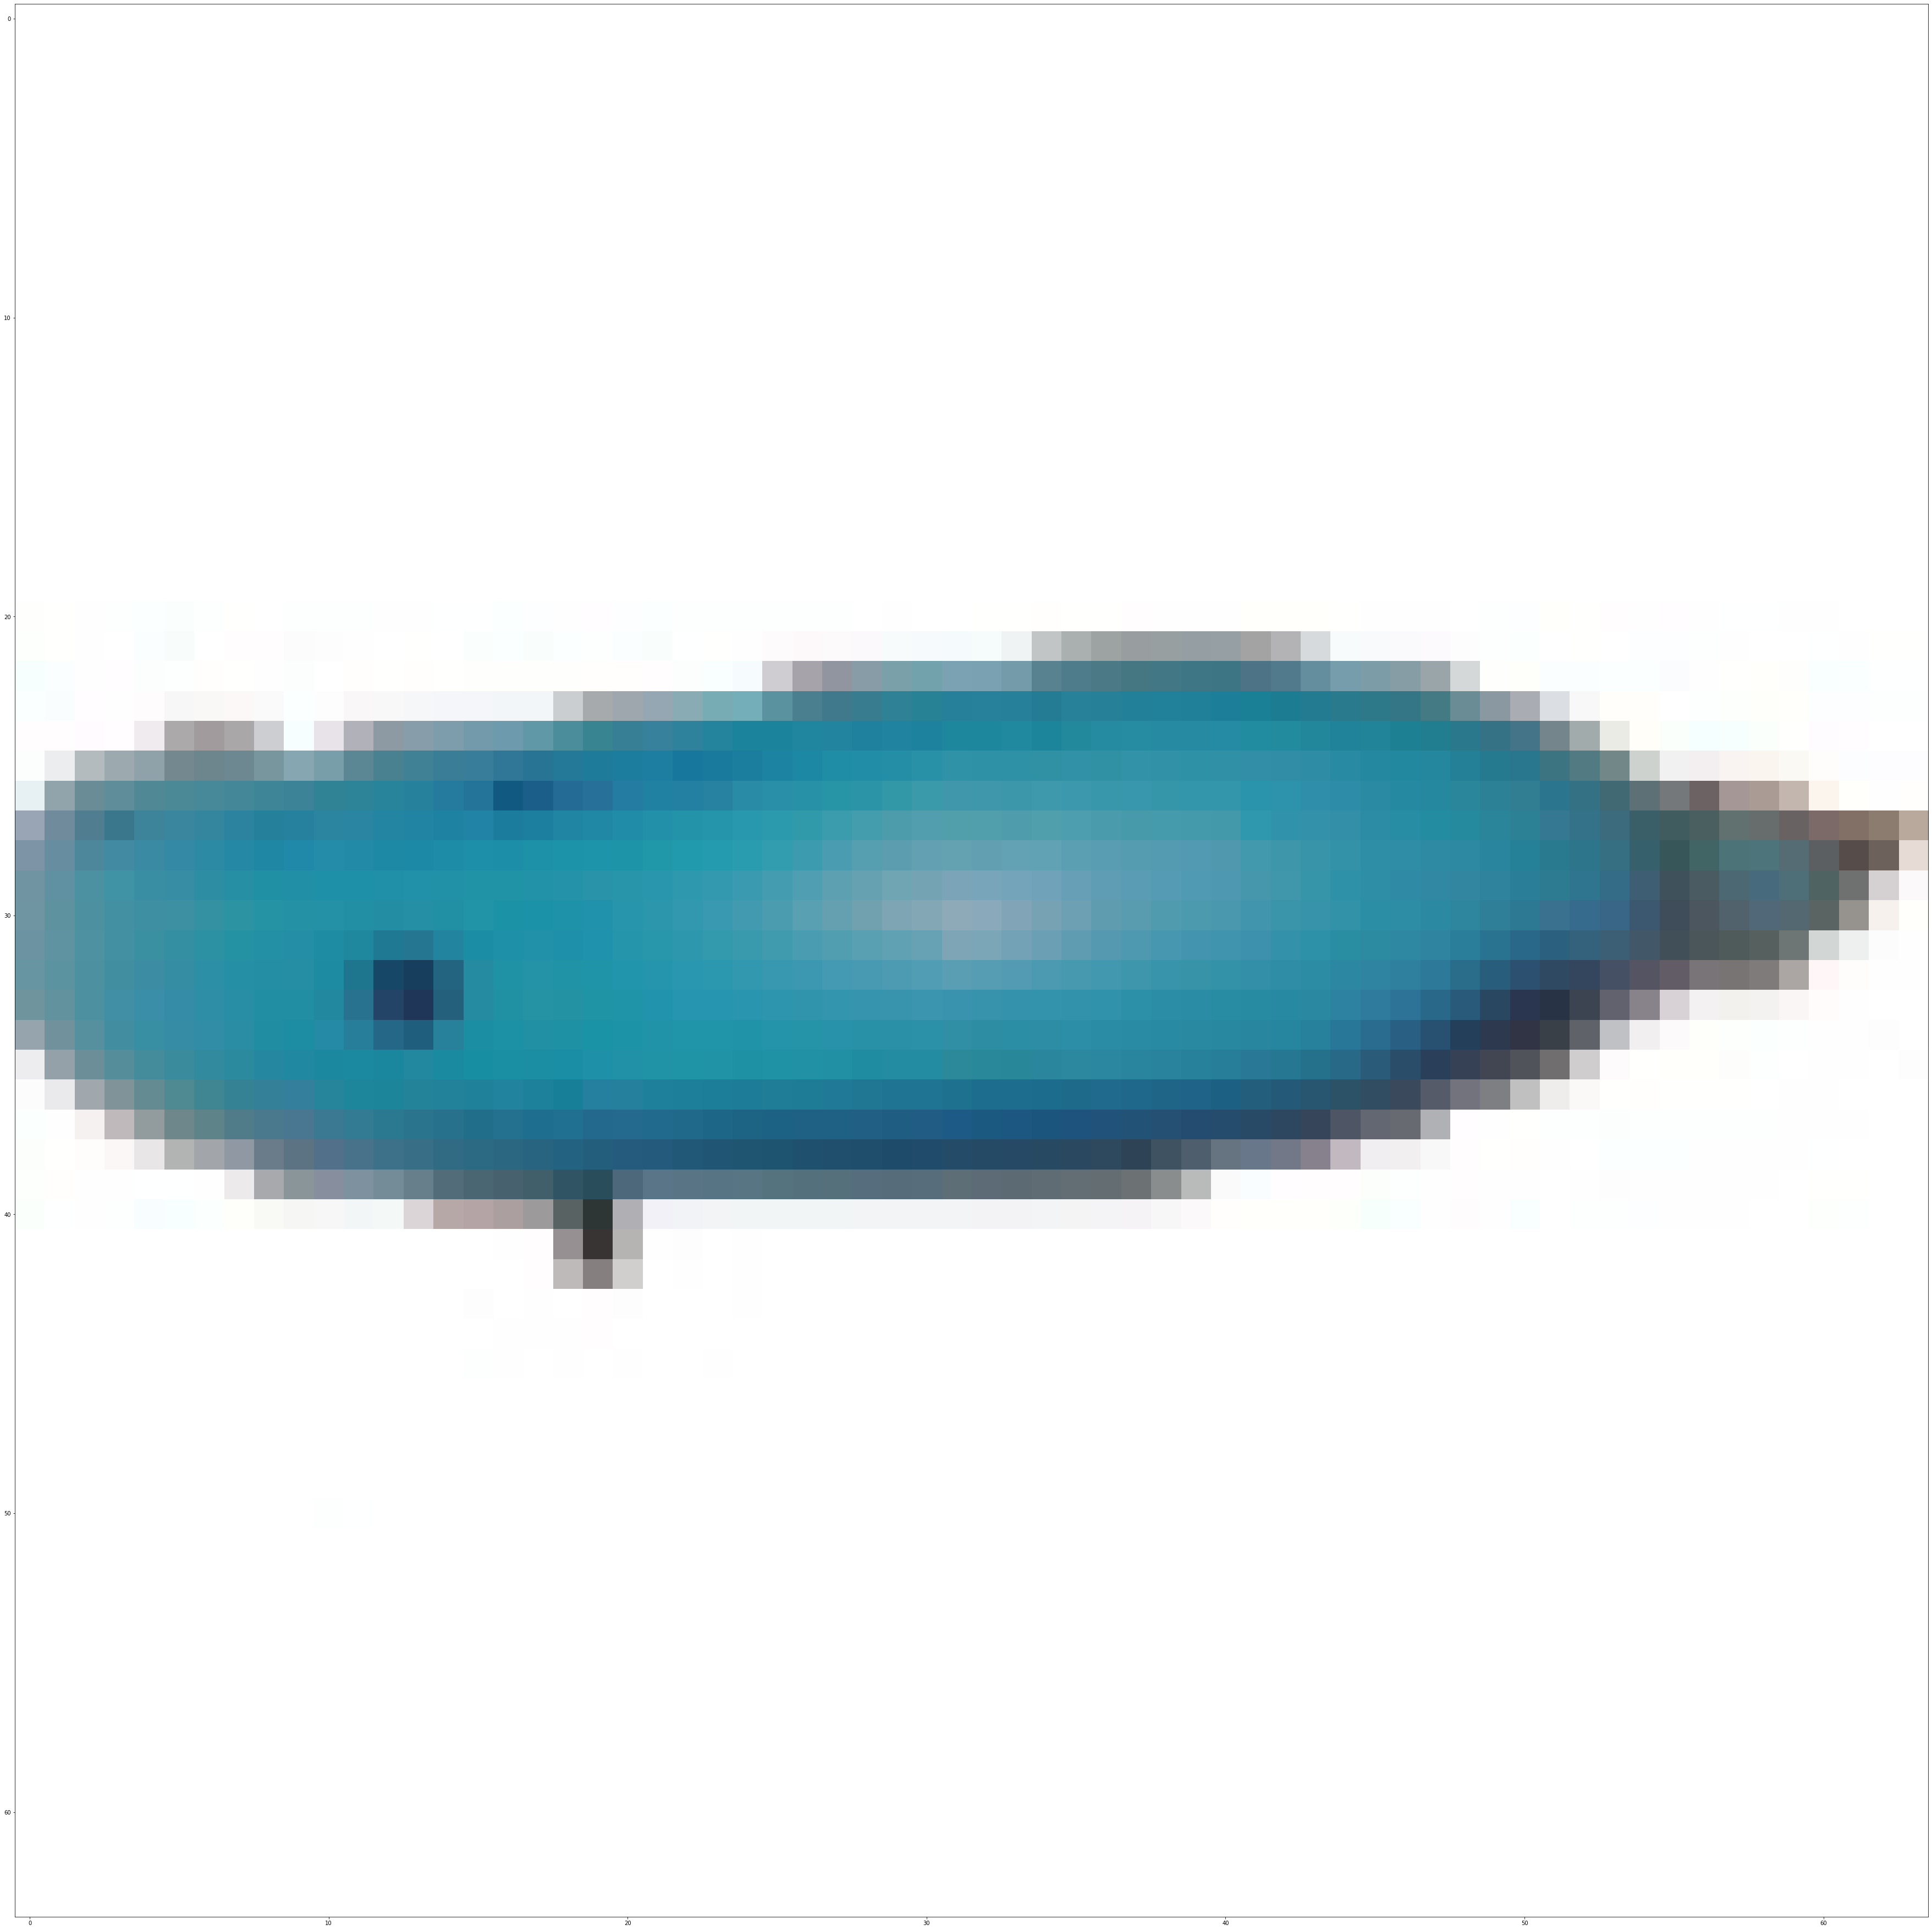

In [20]:
# Load lại test data để model thử predict
X_pred, y_pred = load_test_data()
class_pred = load_class()

# num to predict
num = 2700

# Hiển thị hình ảnh predict
plt.figure(figsize=(64, 64))
plt.imshow(X_pred[num])

# Chuẩn hoá dữ liệu predict
X_pred = np.array(list(map(convertImage, X_pred)))

# Predict
X_pred = X_pred.reshape(-1, 64, 64, 1)
y_pred_by_model = model.predict(X_pred[num-1:num])
print('True Class: ', class_pred[np.argmax(y_pred[num])])
print('Predicted Class: ', class_pred[np.argmax(y_pred_by_model)])

(22688, 64, 64, 3)
(22688, 131)
131
True Class:  Tomato Cherry Red
Predicted Class:  Tomato Cherry Red


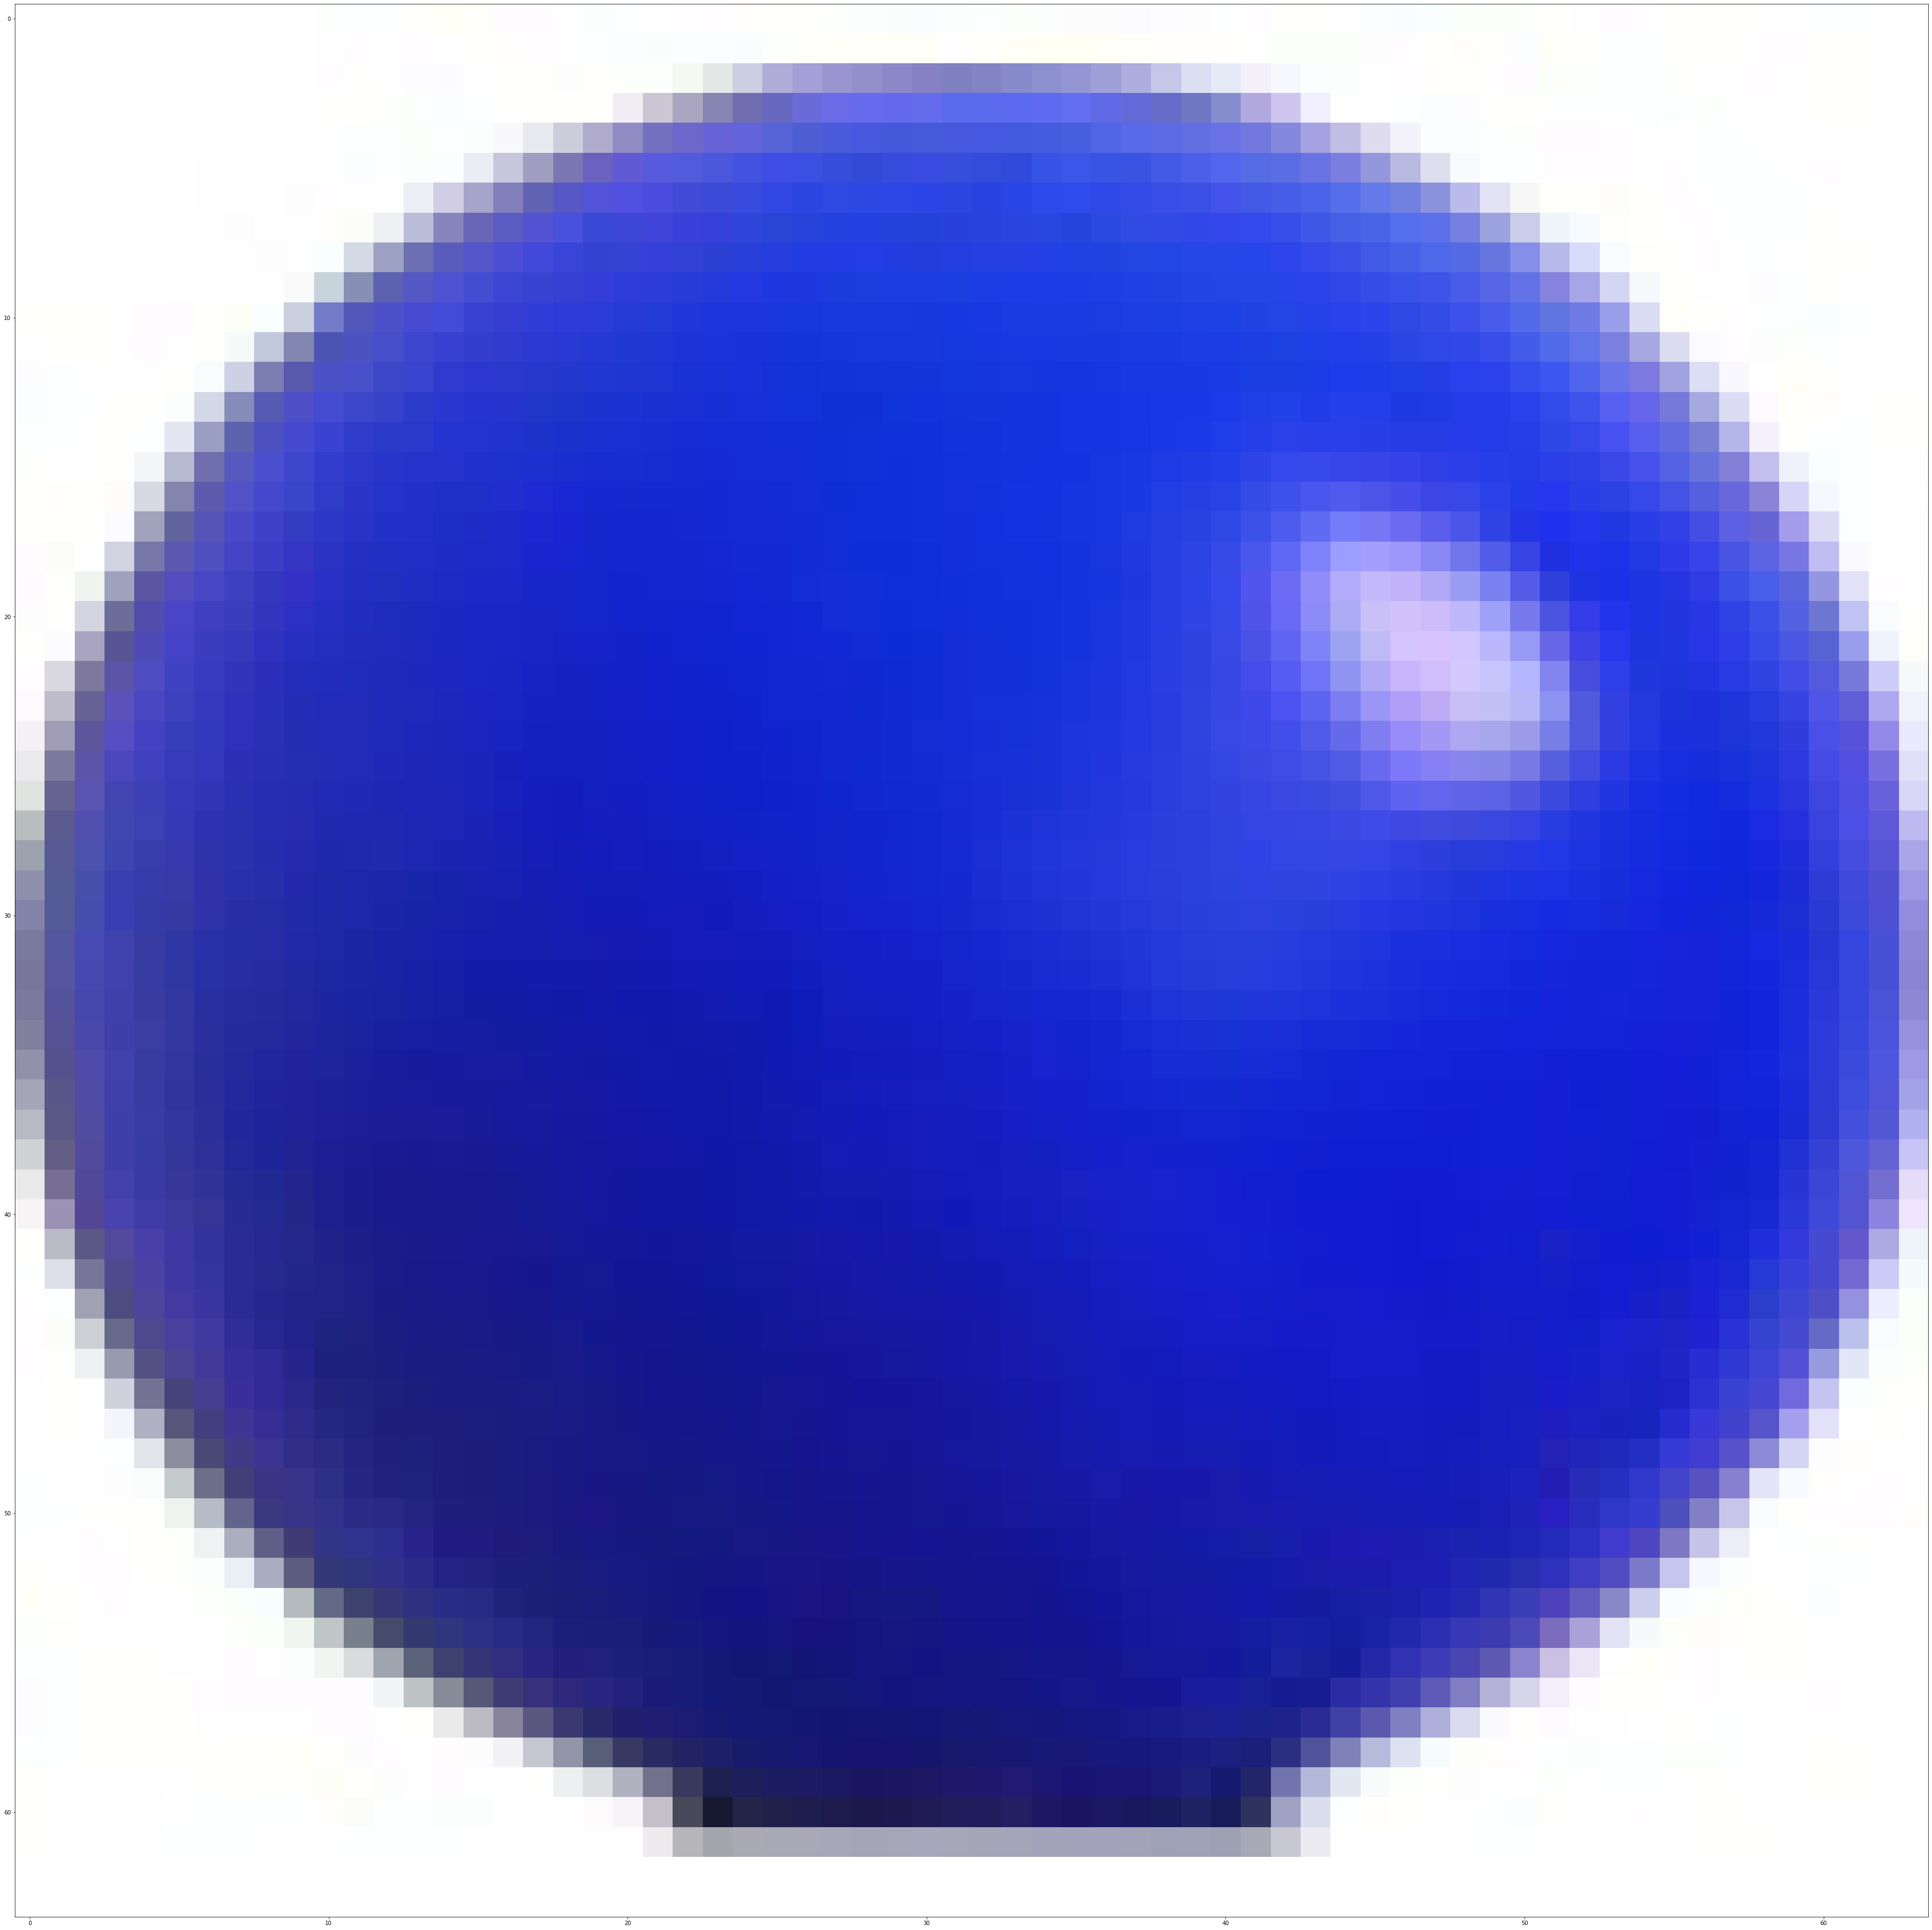

In [21]:
# Load lại test data để model thử predict
X_pred, y_pred = load_test_data()
class_pred = load_class()

# num to predict
num = 21572

# Hiển thị hình ảnh predict
plt.figure(figsize=(64, 64))
plt.imshow(X_pred[num])

# Chuẩn hoá dữ liệu predict
X_pred = np.array(list(map(convertImage, X_pred)))

# Predict
X_pred = X_pred.reshape(-1, 64, 64, 1)
y_pred_by_model = model.predict(X_pred[num-1:num])
print('True Class: ', class_pred[np.argmax(y_pred[num])])
print('Predicted Class: ', class_pred[np.argmax(y_pred_by_model)])

(22688, 64, 64, 3)
(22688, 131)
131
True Class:  Watermelon
Predicted Class:  Watermelon


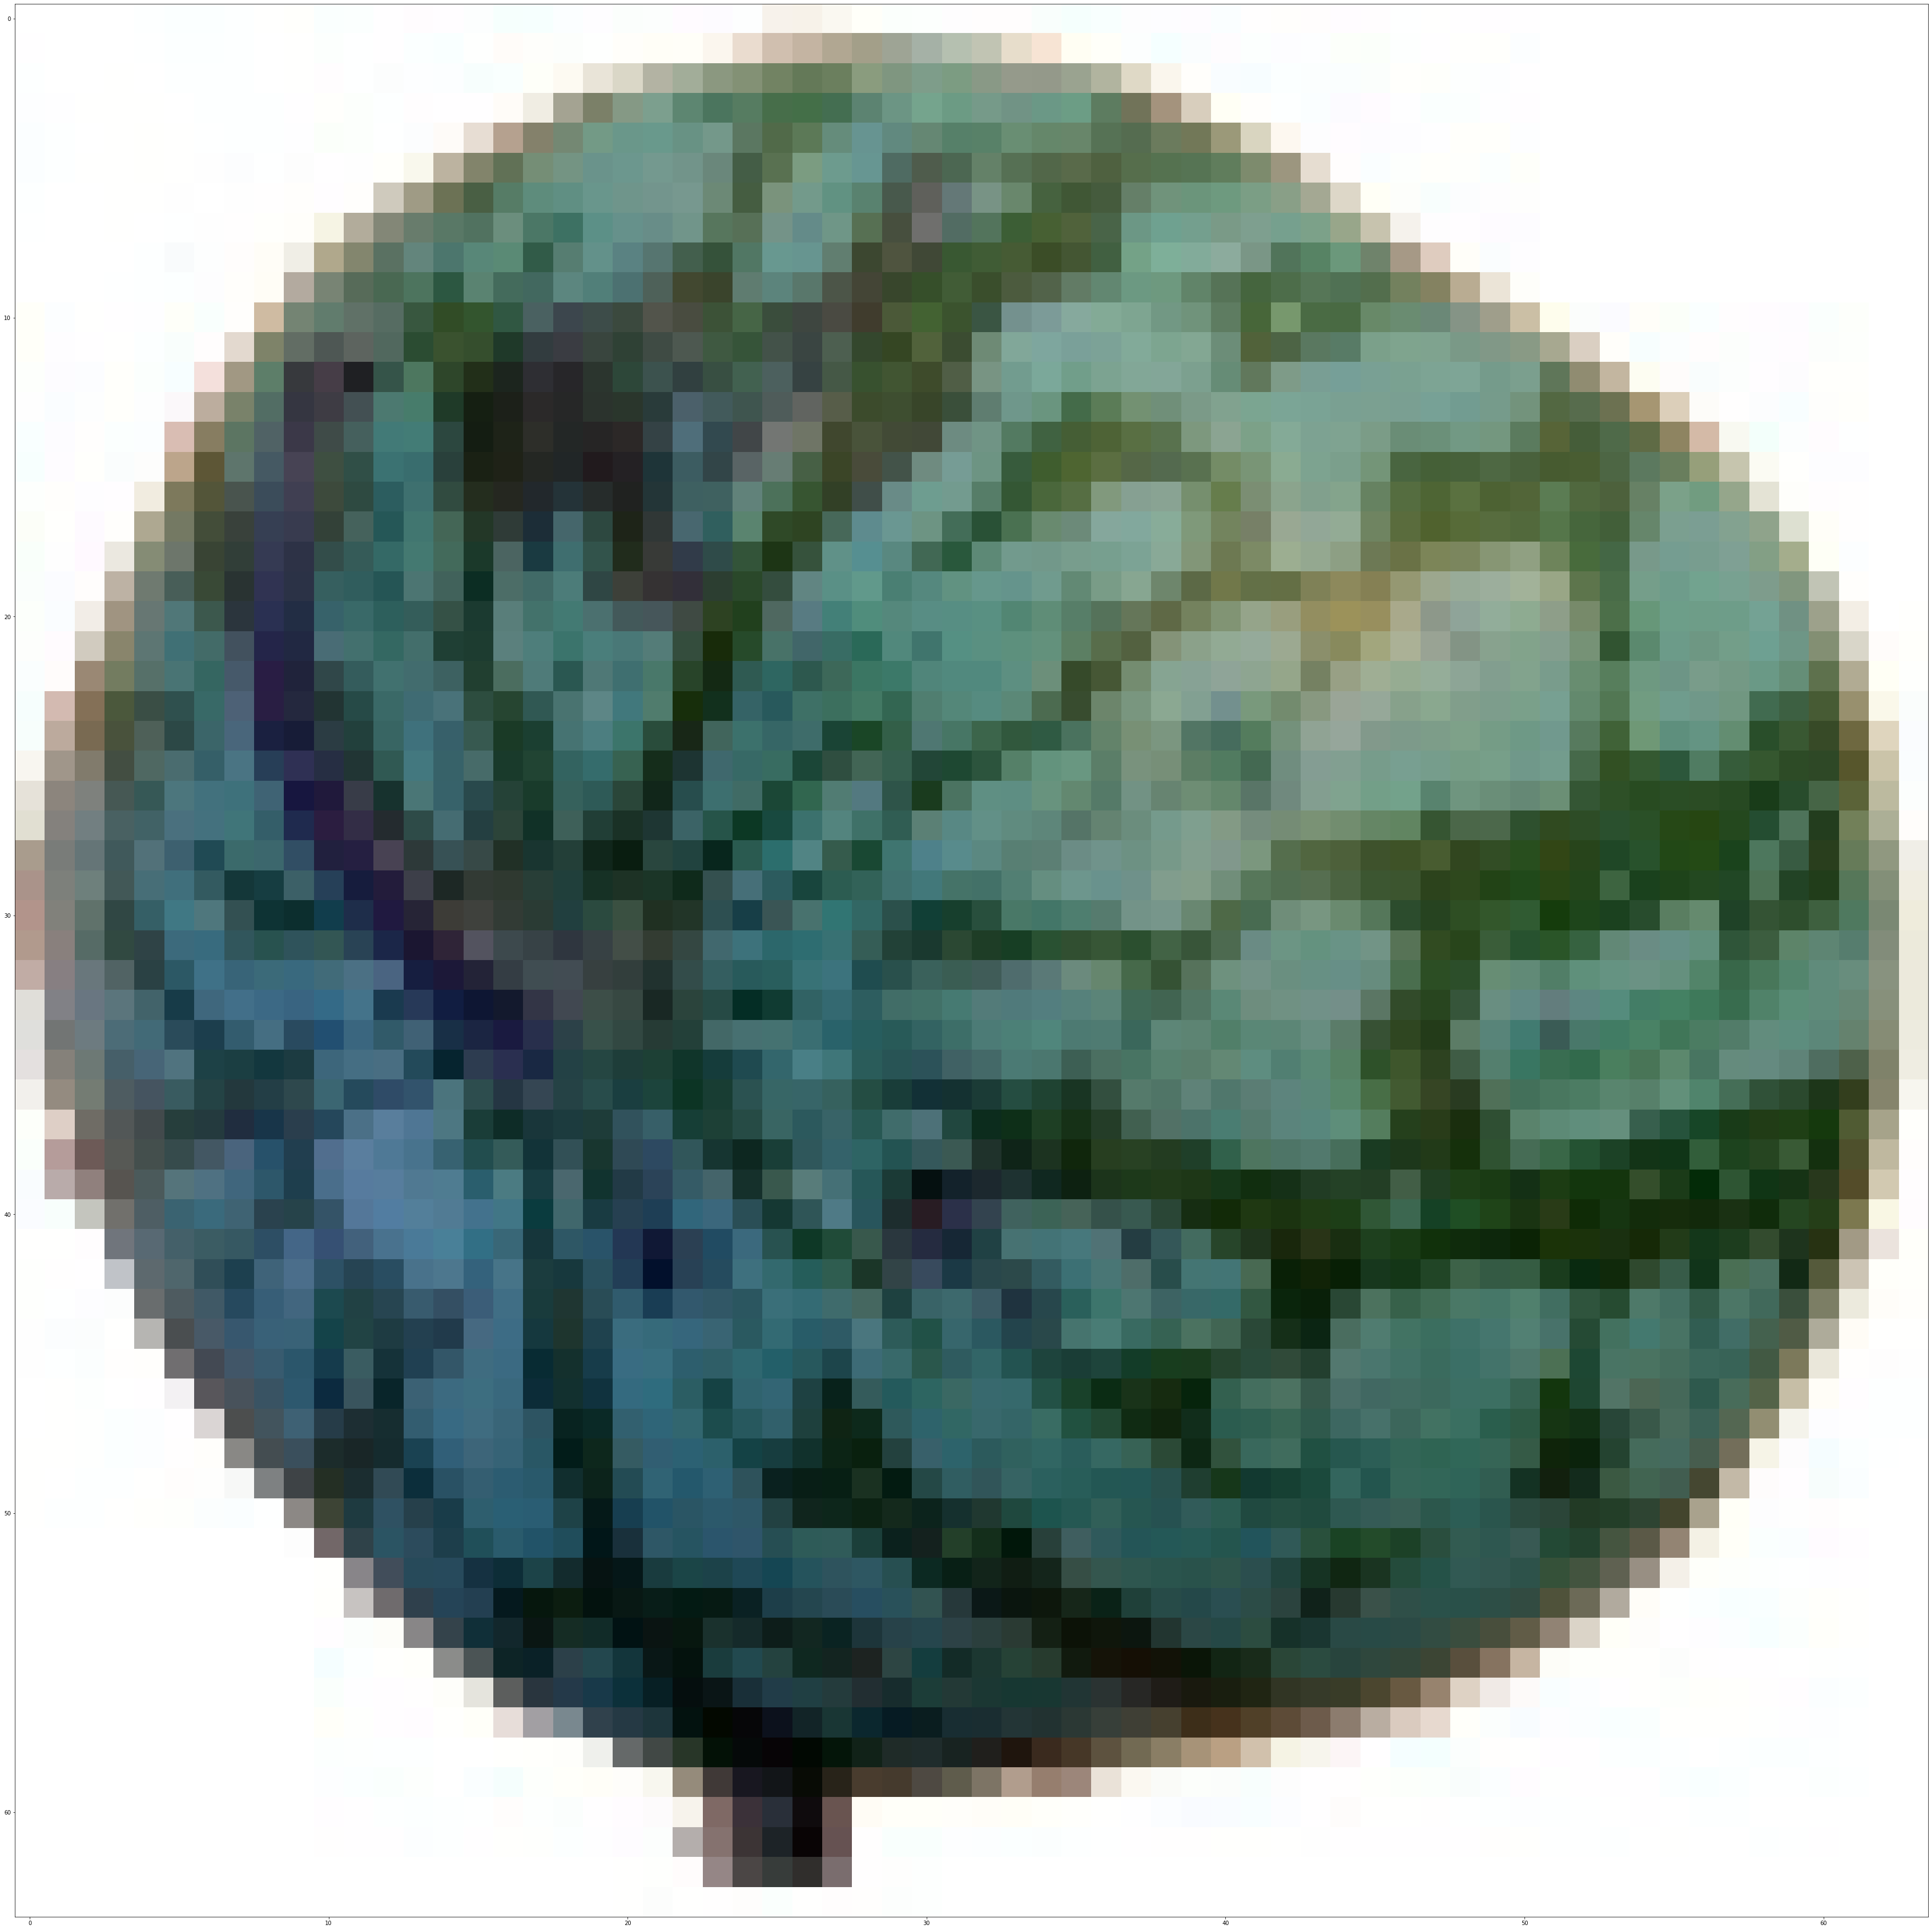

In [22]:
# Load lại test data để model thử predict
X_pred, y_pred = load_test_data()
class_pred = load_class()

# num to predict
num = 22687

# Hiển thị hình ảnh predict
plt.figure(figsize=(64, 64))
plt.imshow(X_pred[num])

# Chuẩn hoá dữ liệu predict
X_pred = np.array(list(map(convertImage, X_pred)))

# Predict
X_pred = X_pred.reshape(-1, 64, 64, 1)
y_pred_by_model = model.predict(X_pred[num-1:num])
print('True Class: ', class_pred[np.argmax(y_pred[num])])
print('Predicted Class: ', class_pred[np.argmax(y_pred_by_model)])

(22688, 64, 64, 3)
(22688, 131)
131
True Class:  Apple Golden 2
Predicted Class:  Apple Golden 2


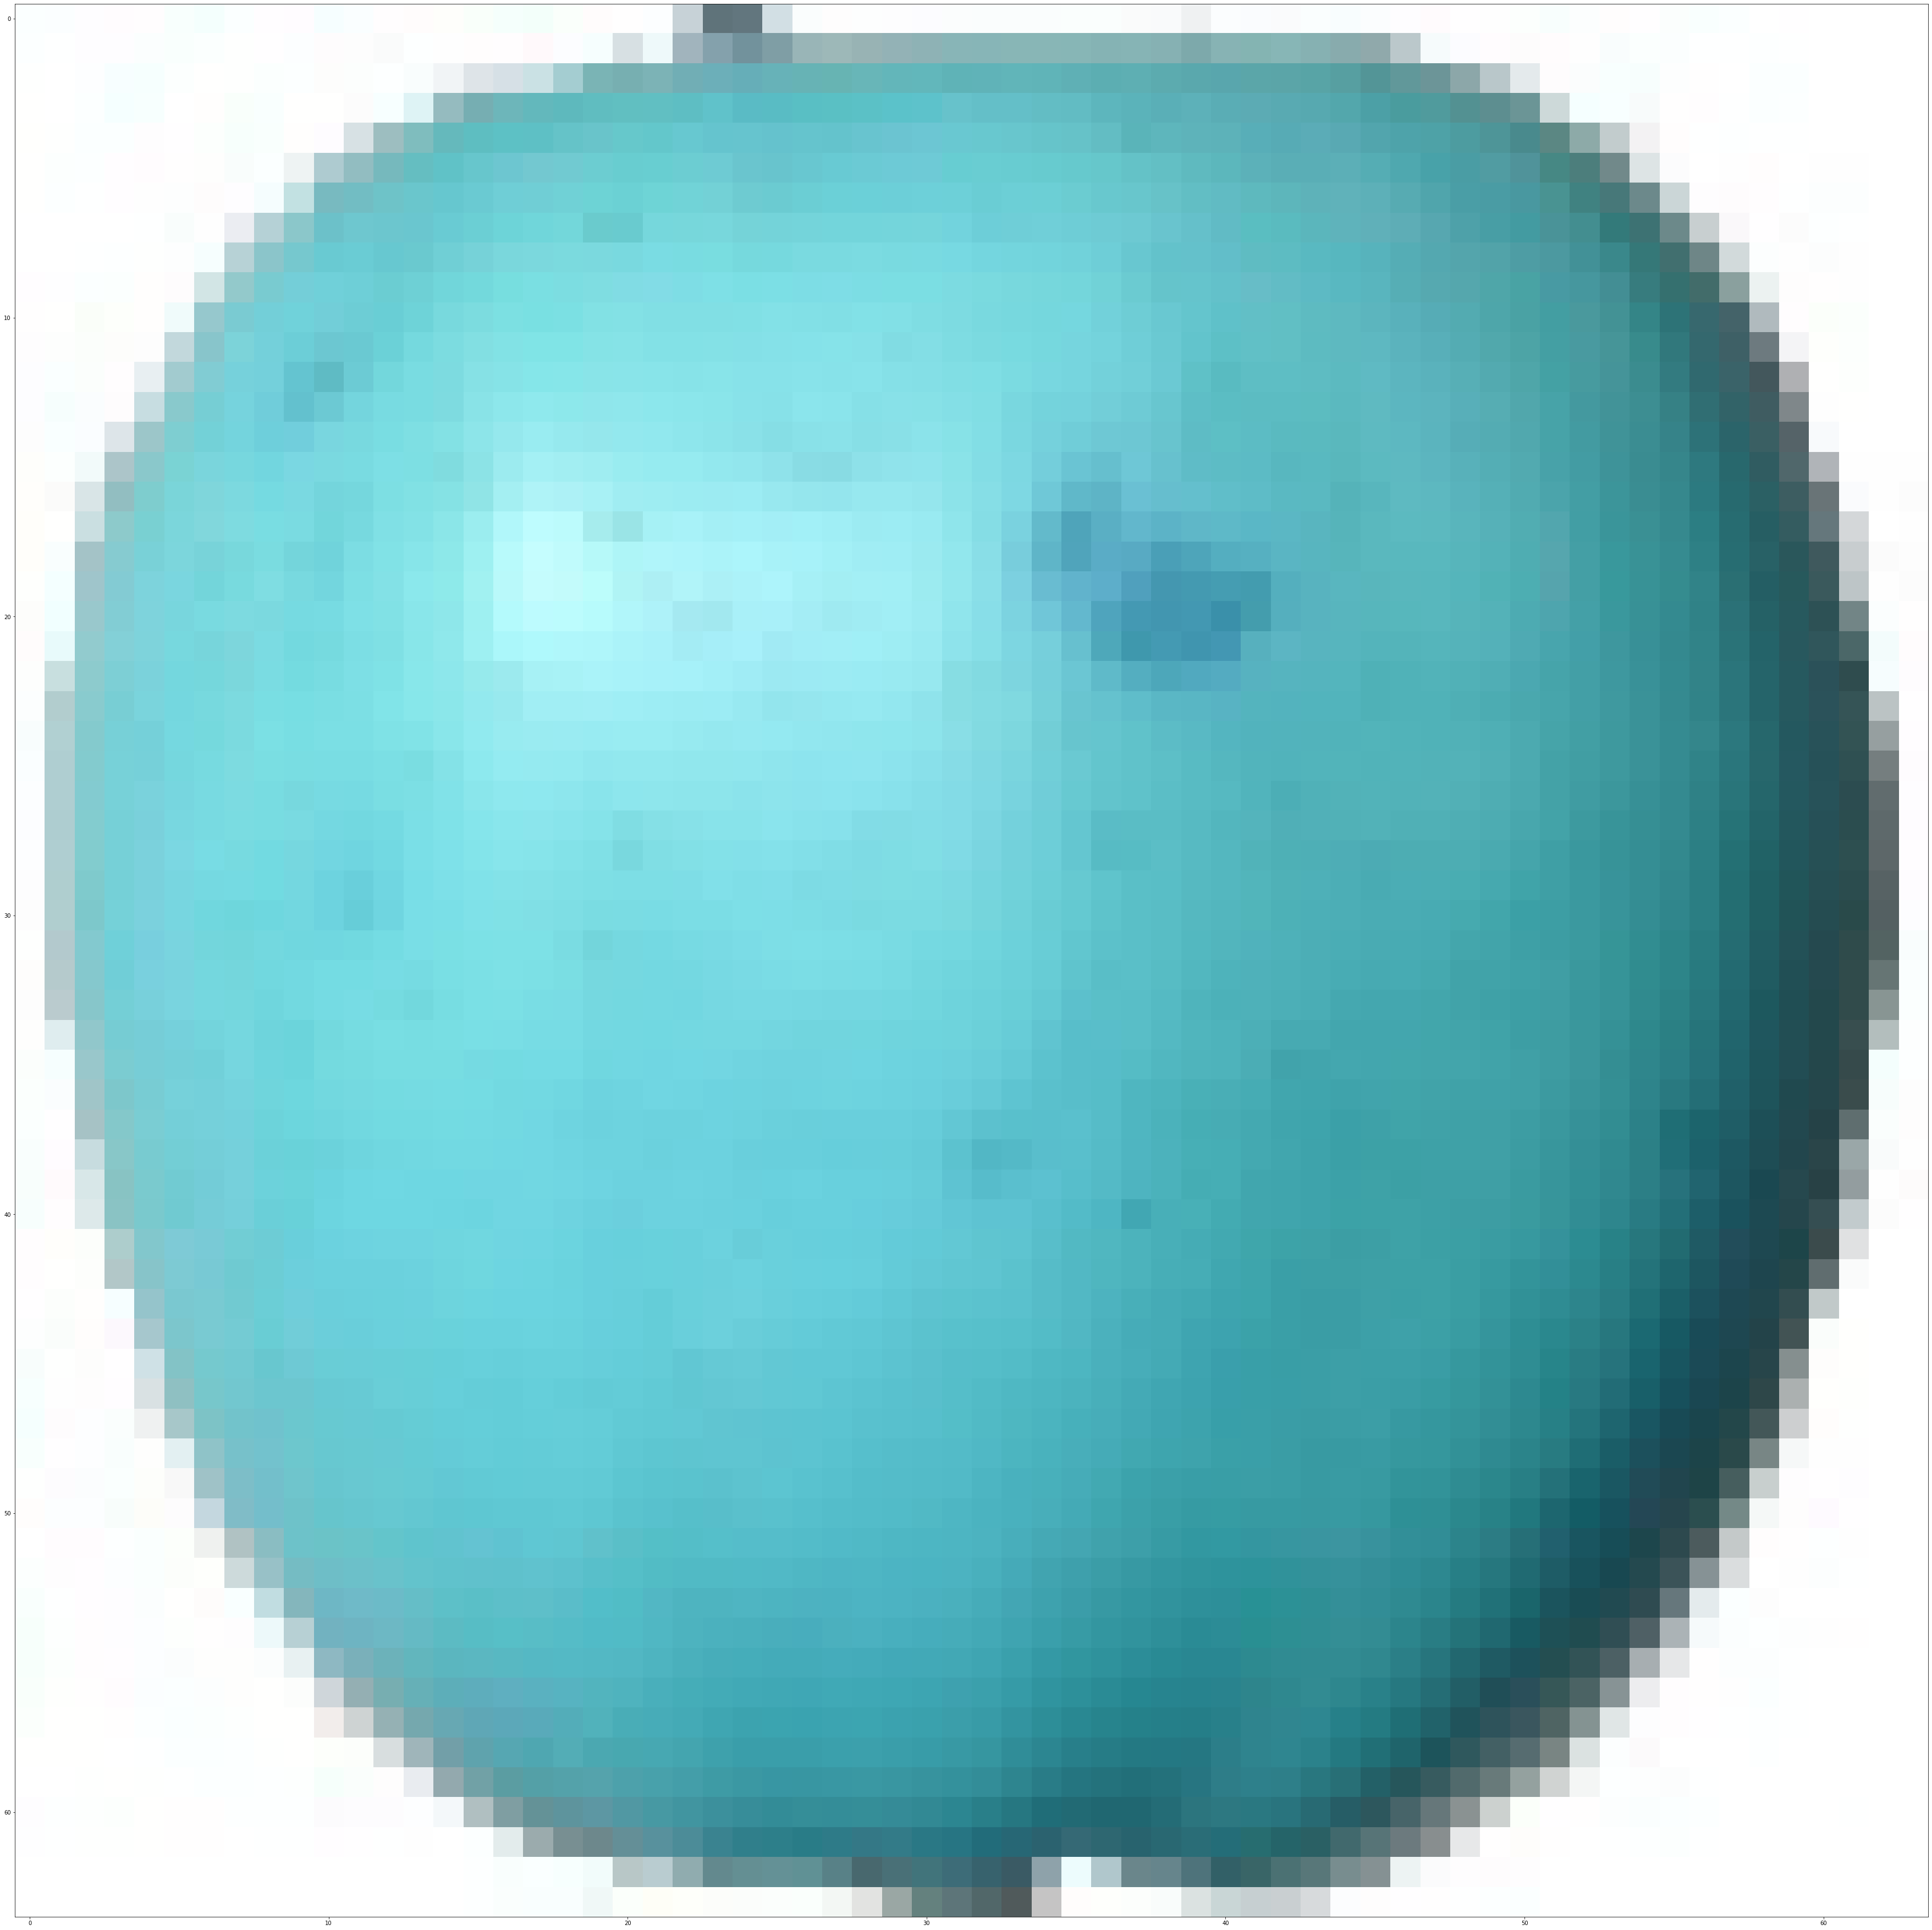

In [23]:
# Load lại test data để model thử predict
X_pred, y_pred = load_test_data()
class_pred = load_class()

# num to predict
num = 547

# Hiển thị hình ảnh predict
plt.figure(figsize=(64, 64))
plt.imshow(X_pred[num])

# Chuẩn hoá dữ liệu predict
X_pred = np.array(list(map(convertImage, X_pred)))

# Predict
X_pred = X_pred.reshape(-1, 64, 64, 1)
y_pred_by_model = model.predict(X_pred[num-1:num])
print('True Class: ', class_pred[np.argmax(y_pred[num])])
print('Predicted Class: ', class_pred[np.argmax(y_pred_by_model)])

(22688, 64, 64, 3)
(22688, 131)
131
True Class:  Orange
Predicted Class:  Orange


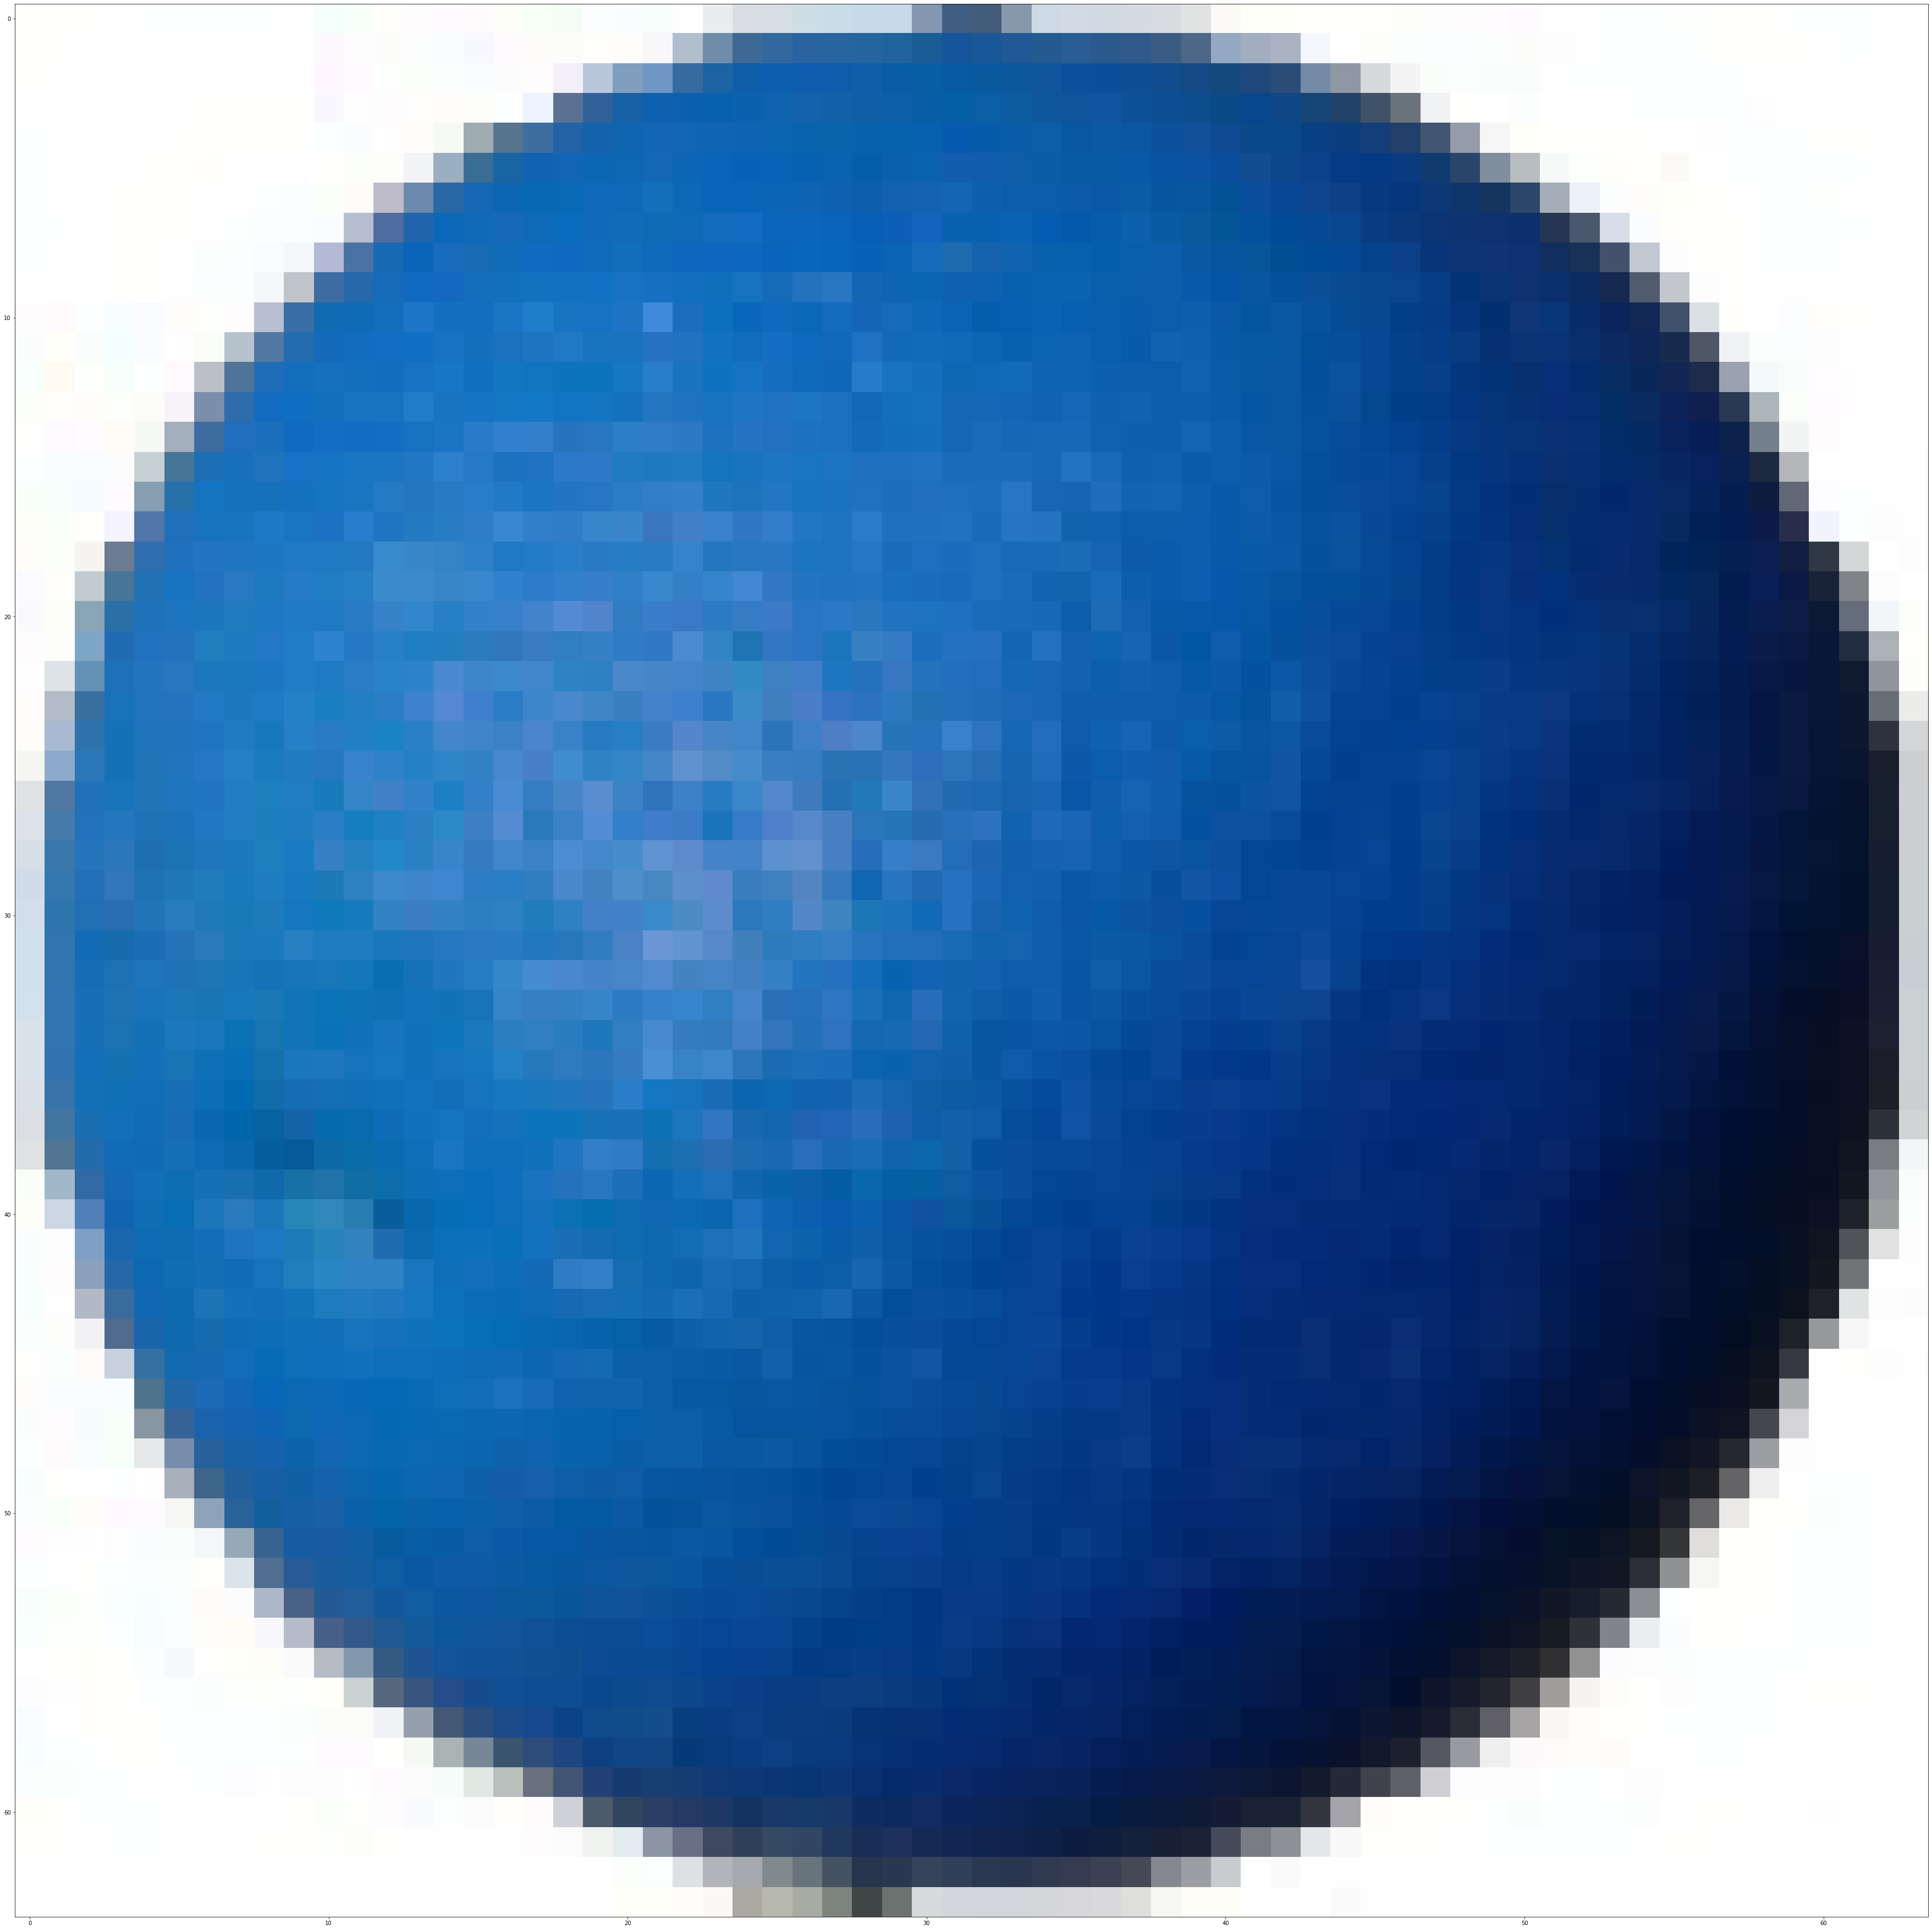

In [24]:
# Load lại test data để model thử predict
X_pred, y_pred = load_test_data()
class_pred = load_class()

# num to predict
num = 13048

# Hiển thị hình ảnh predict
plt.figure(figsize=(64, 64))
plt.imshow(X_pred[num])

# Chuẩn hoá dữ liệu predict
X_pred = np.array(list(map(convertImage, X_pred)))

# Predict
X_pred = X_pred.reshape(-1, 64, 64, 1)
y_pred_by_model = model.predict(X_pred[num-1:num])
print('True Class: ', class_pred[np.argmax(y_pred[num])])
print('Predicted Class: ', class_pred[np.argmax(y_pred_by_model)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


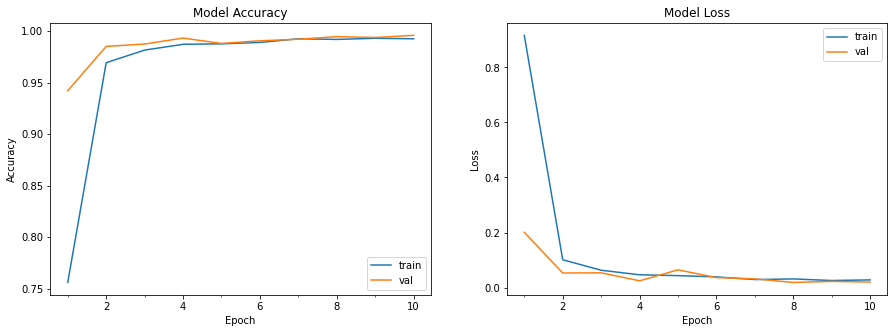

In [26]:
# Đánh giá model
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[acc]) + 1), len(model_history.history[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    #plt.show()
    plt.savefig('roc.png')
    return

plot_model_history(hist)